# DALL-E

This notebook shows how to use OpenAI's DALL-E image API endpoints.

There are three API endpoints:
- **Generations:** generates an image or images based on an input caption
- **Edits:** edits or extends an existing image
- **Variations:** generates variations of an input image

## Setup

- Import the packages you'll need
- Import your OpenAI API key: You can do this by running \``export OPENAI_API_KEY="your API key"`\` in your terminal.
- Set a directory to save images to

In [3]:
# imports
import openai  # OpenAI Python library to make API calls
import requests  # used to download images
import os  # used to access filepaths
from PIL import Image  # used to print and edit images

# set API key
openai.api_key = os.environs.get("OPENAI_API_KEY")


In [4]:
# set a directory to save DALL-E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f"{image_dir=}")


image_dir='./images'


## Generations

The generation API endpoint creates an image based on a text prompt.

**Required inputs:**
- prompt (str): A text description of the desired image(s). The maximum length is 1000 characters.

**Optional inputs:**
- n (int): The number of images to generate. Must be between 1 and 10. Defaults to 1.
- size (str): The size of the generated images. Must be one of "256x256", "512x512", or "1024x1024". Smaller images are faster. Defaults to "1024x1024".
- response_format (str): The format in which the generated images are returned. Must be one of "url" or "b64_json". Defaults to "url".
- user (str): A unique identifier representing your end-user, which will help OpenAI to monitor and detect abuse. [Learn more.](https://beta.openai.com/docs/usage-policies/end-user-ids)

In [5]:
# create an image

# set the prompt
prompt = "A cyberpunk monkey hacker dreaming of a beautiful bunch of bananas, digital art"

# call the OpenAI API
generation_response = openai.Image.create(
    prompt=prompt,
    n=1,
    size="1024x1024",
    response_format="url",
)

# print response
print(generation_response)


{
  "created": 1683652816,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-IqLUjYizOQAd8SpTPRIpPH8Y/user-ldCJ4Rp0pHPZHNDkphs97q9k/img-zVVP3YKIPqtvGEa7L8uqvcgf.png?st=2023-05-09T16%3A20%3A16Z&se=2023-05-09T18%3A20%3A16Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-05-08T20%3A04%3A04Z&ske=2023-05-09T20%3A04%3A04Z&sks=b&skv=2021-08-06&sig=utxoB2aQA4osU%2BbOICV9S%2B/VcMbVbKAC0M5M/vrqYT4%3D"
    }
  ]
}


Note: If you get this error - `AttributeError: module 'openai' has no attribute 'Image'` - you'll need to upgrade your OpenAI package to the latest version. You can do this by running `pip install openai --upgrade` in your terminal.

In [6]:
# save the image
generated_image_name = "generated_image.png"  # any name you like; the filetype should be .png
generated_image_filepath = os.path.join(image_dir, generated_image_name)
set_image_name = "madonnas_foyer.png"
set_image_filepath = os.path.join(image_dir, set_image_name)
generated_image_url = generation_response["data"][0]["url"]  # extract image URL from response
generated_image = requests.get(generated_image_url).content  # download the image

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  # write the image to the file


./images/generated_image.png


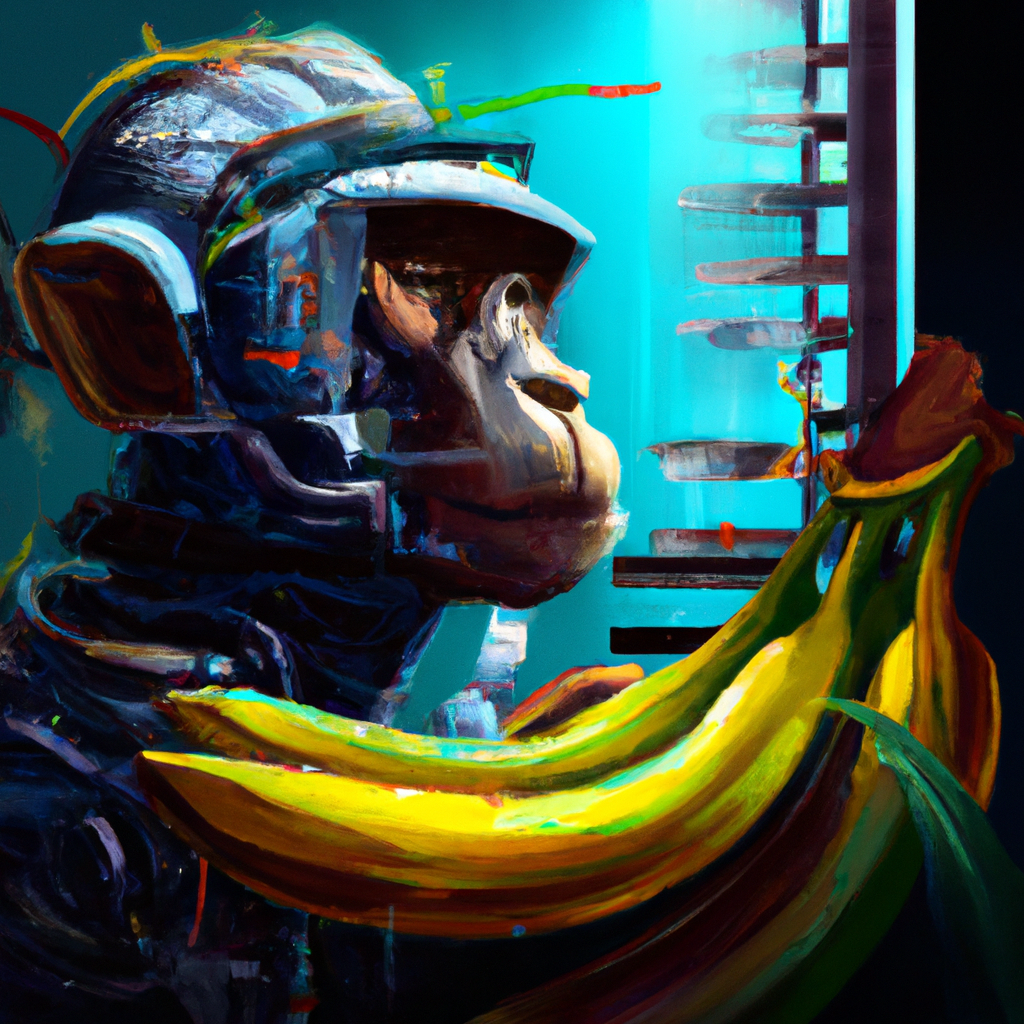

./images/madonnas_foyer.png


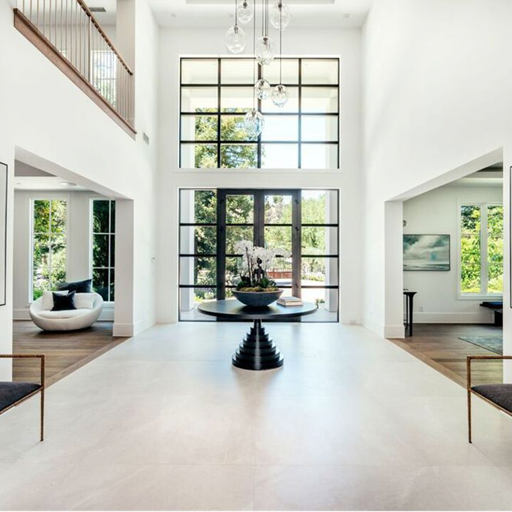

In [7]:
# print the image
print(generated_image_filepath)
display(Image.open(generated_image_filepath))
print(set_image_filepath)
display(Image.open(set_image_filepath))


## Variations

The variations endpoint generates new images (variations) similar to an input image.

Here we'll generate variations of the image generated above.

**Required inputs:**
- image (str): The image to use as the basis for the variation(s). Must be a valid PNG file, less than 4MB, and square.

**Optional inputs:**
- n (int): The number of images to generate. Must be between 1 and 10. Defaults to 1.
- size (str): The size of the generated images. Must be one of "256x256", "512x512", or "1024x1024". Smaller images are faster. Defaults to "1024x1024".
- response_format (str): The format in which the generated images are returned. Must be one of "url" or "b64_json". Defaults to "url".
- user (str): A unique identifier representing your end-user, which will help OpenAI to monitor and detect abuse. [Learn more.](https://beta.openai.com/docs/usage-policies/end-user-ids)


In [9]:
# create variations

# call the OpenAI API, using `create_variation` rather than `create`
variation_response = openai.Image.create_variation(
    image=open(set_image_filepath, "rb"),  # generated_image is the image generated above
    n=2,
    size="512x512",
    response_format="url",
)

# print response
print(variation_response)


{
  "created": 1683653408,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-IqLUjYizOQAd8SpTPRIpPH8Y/user-ldCJ4Rp0pHPZHNDkphs97q9k/img-HgmEi44dqlHsvtHrxgCsVwMc.png?st=2023-05-09T16%3A30%3A08Z&se=2023-05-09T18%3A30%3A08Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-05-08T20%3A03%3A58Z&ske=2023-05-09T20%3A03%3A58Z&sks=b&skv=2021-08-06&sig=ZjUahjWe5IFN%2BLw4kQrvf/sxVUN6GgxUayDetRV4fXM%3D"
    },
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-IqLUjYizOQAd8SpTPRIpPH8Y/user-ldCJ4Rp0pHPZHNDkphs97q9k/img-QD1vBE82xjiWGDUcUyWC2eiH.png?st=2023-05-09T16%3A30%3A08Z&se=2023-05-09T18%3A30%3A08Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-05-08T20%3A03%3A58Z&ske=2023-05-09T20%3A03%3A58Z&sks=b&skv=2021-08-06&sig=bFkRYUpSRStw

In [14]:
# save the images
variation_urls = [datum["url"] for datum in variation_response["data"]]  # extract URLs
variation_images = [requests.get(url).content for url in variation_urls]  # download images
variation_image_names = [f"variation_image_{i}.png" for i in range(len(variation_images))]  # create names
variation_image_filepaths = [os.path.join(image_dir, name) for name in variation_image_names]  # create filepaths
for image, filepath in zip(variation_images, variation_image_filepaths):  # loop through the variations
    with open(filepath, "wb") as image_file:  # open the file
        image_file.write(image)  # write the image to the file


./images/madonnas_foyer.png


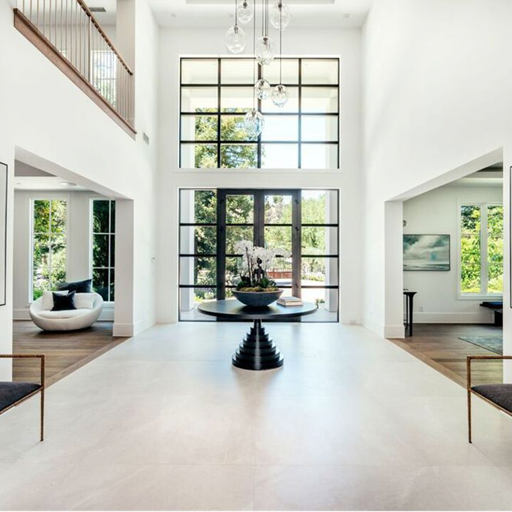

./images/variation_image_0.png


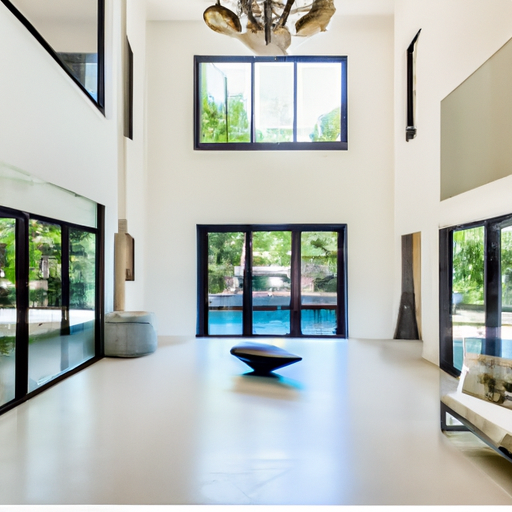

./images/variation_image_1.png


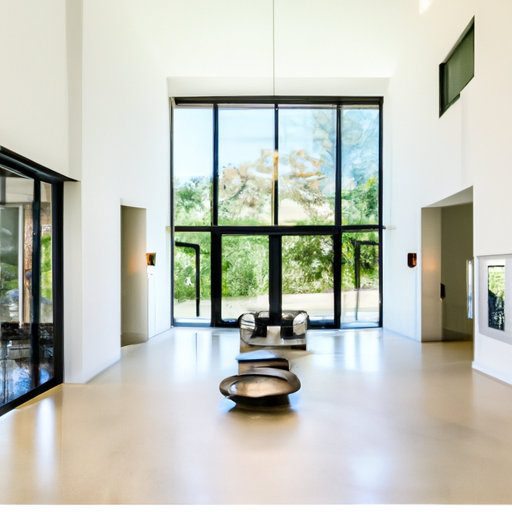

In [15]:
# print the original image
print(set_image_filepath)
display(Image.open(set_image_filepath))

# print the new variations
for variation_image_filepaths in variation_image_filepaths:
    print(variation_image_filepaths)
    display(Image.open(variation_image_filepaths))


## Edits

The edit endpoint uses DALL-E to generate a specified portion of an existing image. Three inputs are needed: the image to edit, a mask specifying the portion to be regenerated, and a prompt describing the desired image.

**Required inputs:** 
- image (str): The image to edit. Must be a valid PNG file, less than 4MB, and square.
- mask (str): An additional image whose fully transparent areas (e.g. where alpha is zero) indicate where `image` should be edited. Must be a valid PNG file, less than 4MB, and have the same dimensions as `image`.
- prompt (str): A text description of the desired image(s). The maximum length is 1000 characters.

**Optional inputs:**
- n (int): The number of images to generate. Must be between 1 and 10. Defaults to 1.
- size (str): The size of the generated images. Must be one of "256x256", "512x512", or "1024x1024". Smaller images are faster. Defaults to "1024x1024".
- response_format (str): The format in which the generated images are returned. Must be one of "url" or "b64_json". Defaults to "url".
- user (str): A unique identifier representing your end-user, which will help OpenAI to monitor and detect abuse. [Learn more.](https://beta.openai.com/docs/usage-policies/end-user-ids)


### Set Edit Area

An edit requires a "mask" to specify which portion of the image to regenerate. Any pixel with an alpha of 0 (transparent) will be regenerated. The code below creates a 1024x1024 mask where the bottom half is transparent.

In [26]:
# create a mask
width = 512
height = 512
mask = Image.new("RGBA", (width, height), (0, 0, 0, 1))  # create an opaque image mask

# set the bottom half to be transparent
for x in range(width):
    for y in range(height // 2, height):  # only loop over the bottom half of the mask
        # set alpha (A) to zero to turn pixel transparent
        alpha = 0
        mask.putpixel((x, y), (0, 0, 0, alpha))

# save the mask
mask_name = "bottom_half_mask.png"
mask_filepath = os.path.join(image_dir, mask_name)
mask.save(mask_filepath)


Bad pipe message: %s [b"\xeb\xfeo\xaa\x9f\x0c\xf5P\x8eO\xe5\xe1\x10\x11\xab\x12\xd5\\\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0s\xc0w\x00\xc4\x00\xc3\xc0#\xc0'\x00g\x00@\xc0r\xc0v\x00\xbe\x00\xbd\xc0\n\xc0\x14\x009\x008\x00\x88\x00\x87\xc0\t\xc0\x13\x003\x002\x00\x9a\x00\x99\x00E\x00D\xc0\x07\xc0\x11\xc0\x08\xc0\x12\x00\x16\x00\x13\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00\xc0\x00<\x00\xba\x005\x00\x84\x00/\x00\x96\x00A\x00\x05\x00\n\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00\x00\x00\r\x000\x00.\x04\x03"]
Bad pipe message: %s [b'\x06\x03\x08\x07', b'\x08\t\x08\n\x08\x0b\x08']
Bad pipe message: %s [b'\x05\x08\x06']
Bad pipe message: %s [b'

### Perform Edit

Now we supply our image, caption and mask to the API to get 5 examples of edits to our image

In [23]:
# edit an image

# call the OpenAI API
edit_response = openai.Image.create_edit(
    image=open(set_image_filepath, "rb"),  # from the generation section
    mask=open(mask_filepath, "rb"),  # from right above
    prompt="a foyer with a fireplace",  # from the generation section
    n=1,
    size="512x512",
    response_format="url",
)

# print response
print(edit_response)


{
  "created": 1683655111,
  "data": [
    {
      "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-IqLUjYizOQAd8SpTPRIpPH8Y/user-ldCJ4Rp0pHPZHNDkphs97q9k/img-bKcWa3wkAzfiRXmHVxIJyGfV.png?st=2023-05-09T16%3A58%3A31Z&se=2023-05-09T18%3A58%3A31Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2023-05-09T17%3A31%3A44Z&ske=2023-05-10T17%3A31%3A44Z&sks=b&skv=2021-08-06&sig=g11zrgj1YxsXIchCz1Bpe8D8kHV/fTQzjNxr28xzPDg%3D"
    }
  ]
}


In [24]:
# save the image
edited_image_name = "edited_image.png"  # any name you like; the filetype should be .png
edited_image_filepath = os.path.join(image_dir, edited_image_name)
edited_image_url = edit_response["data"][0]["url"]  # extract image URL from response
edited_image = requests.get(edited_image_url).content  # download the image

with open(edited_image_filepath, "wb") as image_file:
    image_file.write(edited_image)  # write the image to the file


./images/madonnas_foyer.png


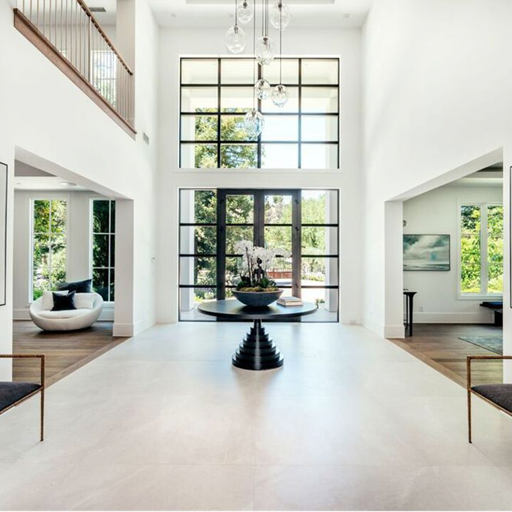

./images/edited_image.png


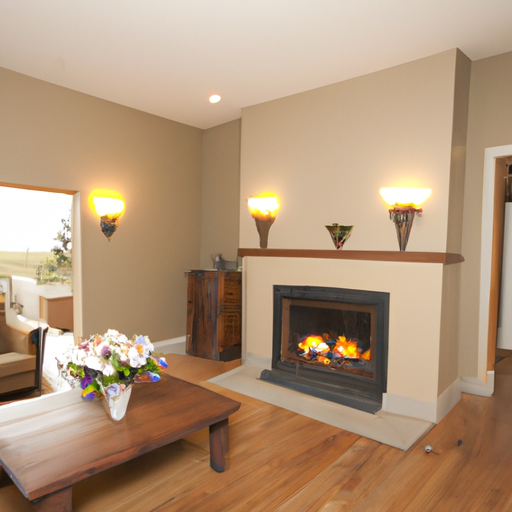

In [25]:
# print the original image
print(set_image_filepath)
display(Image.open(set_image_filepath))

# print edited image
print(edited_image_filepath)
display(Image.open(edited_image_filepath))
